In [1]:
#导入所需要的数据包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import copy
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#1、数据读取
#分别读取训练集、测试集
trainingData = pd.read_csv('D:\陈奕阳文件\北大课程资料\专业课\人工智能引论\小班课大作业\cs-training.csv')
testData = pd.read_csv('D:\陈奕阳文件\北大课程资料\专业课\人工智能引论\小班课大作业\cs-test.csv')

In [3]:
#检查读取情况
trainingData.head(2)#训练集

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0


In [4]:
testData.head(2)#测试集

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0


In [5]:
#检查具体的数据的维数和相关信息
#训练集：
print("以下是训练集维数-------------------")
print(trainingData.shape)
print("以下是训练集信息-------------------")
print(trainingData.info())

以下是训练集维数-------------------
(150000, 12)
以下是训练集信息-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10 

In [6]:
#测试集
print("以下是测试集维数-------------------")
print(testData.shape)
print("以下是测试集信息-------------------")
print(testData.info())

以下是测试集维数-------------------
(101503, 12)
以下是测试集信息-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         81400 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10 

In [7]:
#可以看出如下结论：
print('分析得出以下初步结论：\n')
print('  训练集和测试集的shape分别是（150000，12）和（101503，12），数据虽然维数不高，但是数据样本够大。\n')
print('  Unnamed:0 代表的是样本的序号，不是具体的特征，后面可将这一行所为索引；\n')
print('  SeriousDlqin2yrs：1代表坏客户，0代表好客户，是这个项目的目标变量，我们根据训练集中的数据来预测测试集中SeriousDlqin2yrs的值。\n')
print('  剩下的10列特征是用户的个人信息，他们的不同值构成了不同的用户，我们主要根据这些特征来预测目标变量。\n')
print('  综上：这是一个十维特征构成的二分类问题。')

分析得出以下初步结论：

  训练集和测试集的shape分别是（150000，12）和（101503，12），数据虽然维数不高，但是数据样本够大。

  Unnamed:0 代表的是样本的序号，不是具体的特征，后面可将这一行所为索引；

  SeriousDlqin2yrs：1代表坏客户，0代表好客户，是这个项目的目标变量，我们根据训练集中的数据来预测测试集中SeriousDlqin2yrs的值。

  剩下的10列特征是用户的个人信息，他们的不同值构成了不同的用户，我们主要根据这些特征来预测目标变量。

  综上：这是一个十维特征构成的二分类问题。


In [8]:
#2、数据进一步探索
#2.1 查看数据特征分布情况
#使用seaborn.countplot进行可视化
trainingData.set_index('Unnamed: 0',inplace=True)#更改数据集索引
testData.set_index('Unnamed: 0',inplace=True)#更改测试集索引

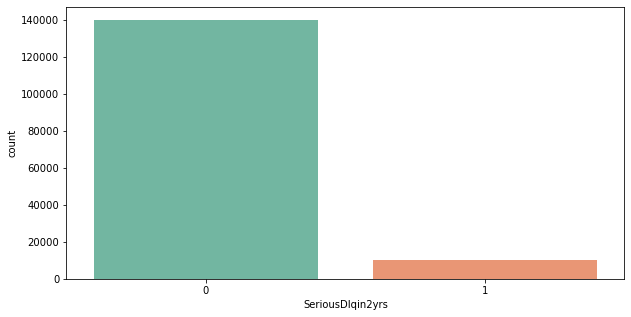

    训练集数据中，“好”客户数量为：139974,“坏”客户数量为：10026,好客户所占比例为：93.32%,坏客户所占比例为：6.68%.

    结论： 好、坏客户分布：我们可以看到样本中好坏客户的比例接近7：93，样本分布及其不均衡，我们在后面建模时需要注意。


In [9]:
#2.1.1 查看好、坏的客户的分布情况：
#可视化操作：
fig,ax = plt.subplots(figsize=(10,5))
sns.countplot('SeriousDlqin2yrs',data=trainingData,palette="Set2")
plt.show()
print('    训练集数据中，“好”客户数量为：%i,“坏”客户数量为：%i,好客户所占比例为：%.2f%%,坏客户所占比例为：%.2f%%.\n' 
      %(trainingData['SeriousDlqin2yrs'].count()-trainingData['SeriousDlqin2yrs'].sum(),trainingData['SeriousDlqin2yrs'].sum(),
        100-(trainingData['SeriousDlqin2yrs'].sum()/trainingData['SeriousDlqin2yrs'].count())*100,
        (trainingData['SeriousDlqin2yrs'].sum()/trainingData['SeriousDlqin2yrs'].count())*100))
print('    结论： 好、坏客户分布：我们可以看到样本中好坏客户的比例接近7：93，样本分布及其不均衡，我们在后面建模时需要注意。')

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64




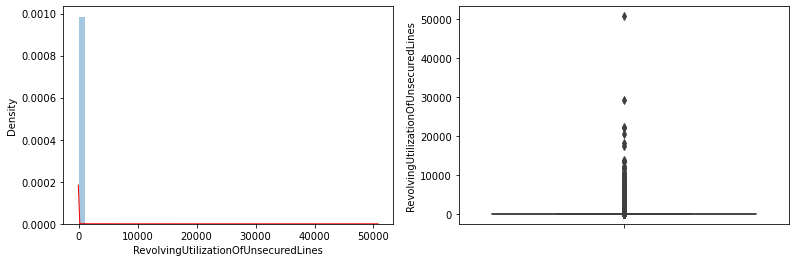

In [10]:
#2.1.2 查看可用额度比值的特征分布
print(trainingData['RevolvingUtilizationOfUnsecuredLines'].describe())
print('\n')
fig,[ax1,ax2]=plt.subplots(1,2,figsize=(13,4))
sns.distplot(trainingData['RevolvingUtilizationOfUnsecuredLines'],ax=ax1,kde_kws={'linestyle':'-','linewidth':'1','color':'red'})                                             
#箱线图
sns.boxplot(y='RevolvingUtilizationOfUnsecuredLines',data=trainingData,ax=ax2)
plt.show()

In [11]:
#得出初步结论：
print('结论：')
print('    数据分布不正常，中位数和四分之三位数都小于1，但是最大值确达到了50708，可用额度比值应该小于1，所以后面将大于1的值当做异常值剔除。\n')

结论：
    数据分布不正常，中位数和四分之三位数都小于1，但是最大值确达到了50708，可用额度比值应该小于1，所以后面将大于1的值当做异常值剔除。



count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64


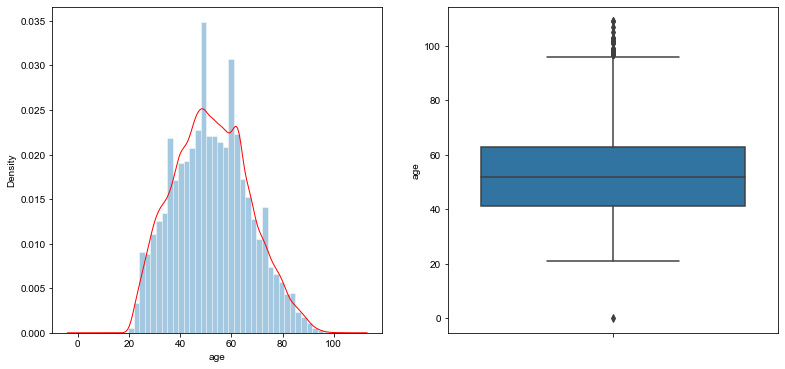

In [12]:
#2.1.3 年龄
print(trainingData['age'].describe())
fig,[ax1,ax2]=plt.subplots(1,2,figsize=(13,6))
sns.set_style("dark", {"axes.facecolor": "#e9f3ea"})
sns.distplot(trainingData['age'],kde_kws={'linestyle':'-','linewidth':'1','color':'red'},ax=ax1)
sns.boxplot(y='age',data=trainingData,ax=ax2)
plt.show()

In [13]:
#看看极端数据：
#小于18岁的
trainingData[trainingData['age']<18]#只有1条，而且年龄为0，后面当做异常值删除

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Unnamed: 0,,,,,,,,,,,
65696,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [14]:
#大于100岁的
trainingData[trainingData['age']>100]#较多、连续，可暂时保留

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Unnamed: 0,,,,,,,,,,,
7764,0,0.069167,101,0,50.000000,NaN,2,0,0,0,0.0
19885,0,1.000000,103,0,0.000000,1600.0,3,0,0,0,0.0
25562,0,0.009866,102,0,0.002424,3300.0,3,0,0,0,0.0
40008,0,0.064748,107,0,939.000000,NaN,9,0,1,0,0.0
56762,0,0.003469,105,0,2.000000,NaN,4,0,0,0,NaN
57968,0,0.001397,103,0,1798.500000,1.0,11,0,2,0,0.0
90938,0,0.000000,102,0,0.000000,NaN,12,0,0,0,0.0
93814,0,0.025780,101,0,0.013797,1666.0,5,0,0,0,0.0
96451,0,0.109642,102,0,0.273844,3417.0,7,0,0,0,1.0


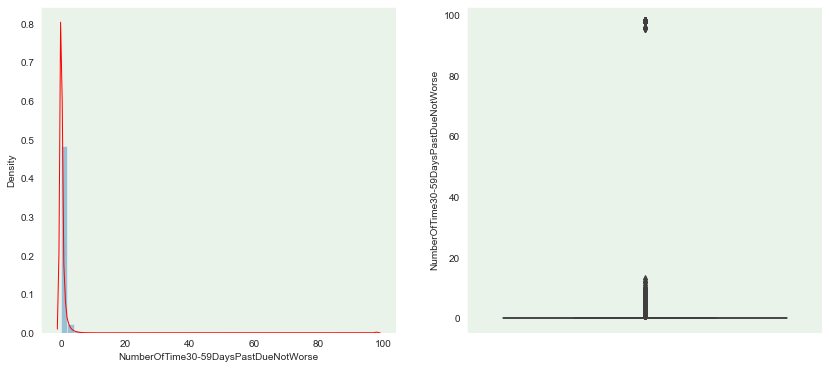

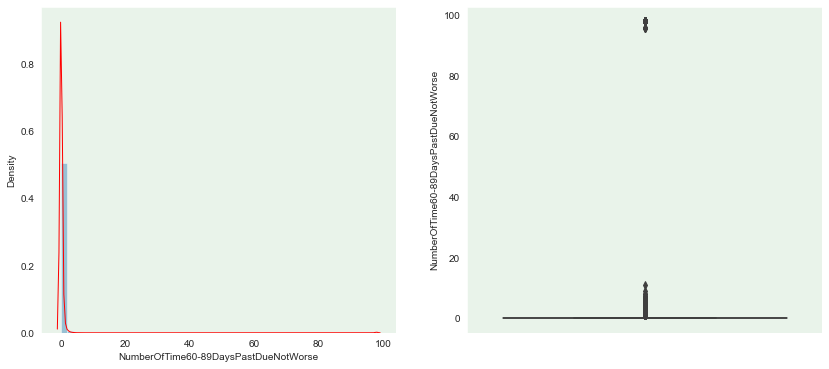

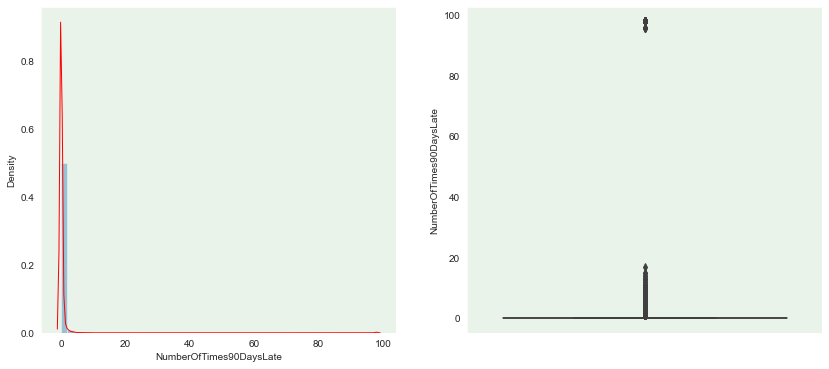

In [15]:
#2.1.4 逾期30-59天 / 60-89天 / 90天笔数的人数分布：
f,[ax1,ax2] = plt.subplots(1,2,figsize=(14,6))
sns.distplot(trainingData['NumberOfTime30-59DaysPastDueNotWorse'],ax=ax1,kde_kws={'linestyle':'-','linewidth':'1','color':'red'})
sns.boxplot(y='NumberOfTime30-59DaysPastDueNotWorse',data=trainingData,ax=ax2)
f,[ax3,ax4] = plt.subplots(1,2,figsize=(14,6))
sns.distplot(trainingData['NumberOfTime60-89DaysPastDueNotWorse'],ax=ax3,kde_kws={'linestyle':'-','linewidth':'1','color':'red'})
sns.boxplot(y='NumberOfTime60-89DaysPastDueNotWorse',data=trainingData,ax=ax4)
f,[ax5,ax6] = plt.subplots(1,2,figsize=(14,6))
sns.distplot(trainingData['NumberOfTimes90DaysLate'],ax=ax5,kde_kws={'linestyle':'-','linewidth':'1','color':'red'})
sns.boxplot(y='NumberOfTimes90DaysLate',data=trainingData,ax=ax6)
plt.show()

In [16]:
print(trainingData[trainingData['NumberOfTime30-59DaysPastDueNotWorse']>13].count())
print("-------------------------")
print(trainingData[trainingData['NumberOfTime30-59DaysPastDueNotWorse']>80].count())
print('\n    这里可以看出逾期30-59天次数大于13次的有269条，大于80次的也是269条，说明这些是异常值，应该删除！\n')
print('------------------------------------\n')
print(trainingData[trainingData['NumberOfTime60-89DaysPastDueNotWorse']>13].count())
print("-------------------------")
print(trainingData[trainingData['NumberOfTime60-89DaysPastDueNotWorse']>80].count())
print('\n    这里可以看出逾期60-89天次数大于13次的有269条，大于80次的也是269条，说明这些是异常值，应该删除！\n')
print('------------------------------------\n')
print(trainingData[trainingData['NumberOfTimes90DaysLate']>17].count())
print("-------------------------")
print(trainingData[trainingData['NumberOfTimes90DaysLate']>80].count())
print('\n    这里可以看出逾期90天以上次数大于17次的有269条，大于80次的也是269条，说明这些是异常值，应该删除！\n')

SeriousDlqin2yrs                        269
RevolvingUtilizationOfUnsecuredLines    269
age                                     269
NumberOfTime30-59DaysPastDueNotWorse    269
DebtRatio                               269
MonthlyIncome                           148
NumberOfOpenCreditLinesAndLoans         269
NumberOfTimes90DaysLate                 269
NumberRealEstateLoansOrLines            269
NumberOfTime60-89DaysPastDueNotWorse    269
NumberOfDependents                      238
dtype: int64
-------------------------
SeriousDlqin2yrs                        269
RevolvingUtilizationOfUnsecuredLines    269
age                                     269
NumberOfTime30-59DaysPastDueNotWorse    269
DebtRatio                               269
MonthlyIncome                           148
NumberOfOpenCreditLinesAndLoans         269
NumberOfTimes90DaysLate                 269
NumberRealEstateLoansOrLines            269
NumberOfTime60-89DaysPastDueNotWorse    269
NumberOfDependents                   

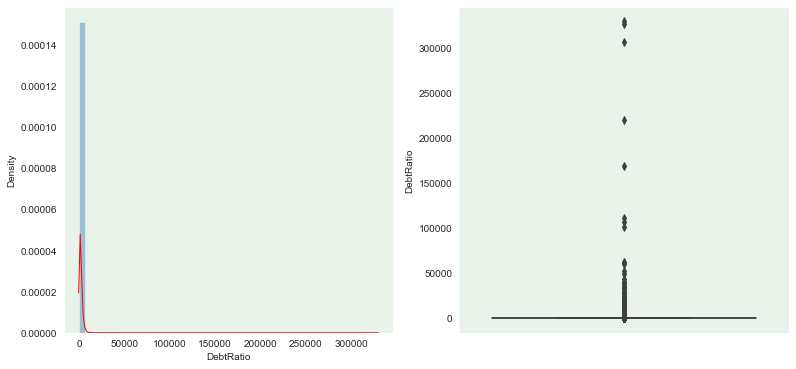

In [17]:
#2.1.5负债比率
fig,[ax1,ax2]=plt.subplots(1,2,figsize=(13,6))
sns.distplot(trainingData['DebtRatio'],ax=ax1,kde_kws={'linestyle':'-','linewidth':'1','color':'red'})
sns.boxplot(y='DebtRatio',data=trainingData,ax=ax2)
plt.show()

In [18]:
print(trainingData['DebtRatio'].describe())
print('\n----------------------\n')
print(trainingData[trainingData['DebtRatio']>1].count())
print('\n    因为大于1的有三万多笔，所以猜测可能不是异常值')

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

----------------------

SeriousDlqin2yrs                        35137
RevolvingUtilizationOfUnsecuredLines    35137
age                                     35137
NumberOfTime30-59DaysPastDueNotWorse    35137
DebtRatio                               35137
MonthlyIncome                            7233
NumberOfOpenCreditLinesAndLoans         35137
NumberOfTimes90DaysLate                 35137
NumberRealEstateLoansOrLines            35137
NumberOfTime60-89DaysPastDueNotWorse    35137
NumberOfDependents                      31689
dtype: int64

    因为大于1的有三万多笔，所以猜测可能不是异常值


count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64


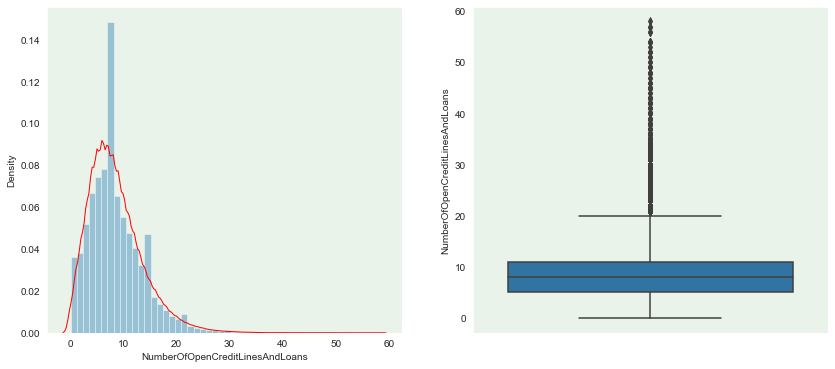


结论：
    由于箱型图的上界值较为连续，所以可能不是异常值


In [19]:
#2.1.6 信贷数量
print(trainingData['NumberOfOpenCreditLinesAndLoans'].describe())
fig,[ax1,ax2]=plt.subplots(1,2,figsize=(14,6))
sns.distplot(trainingData['NumberOfOpenCreditLinesAndLoans'],ax=ax1,kde_kws={'linestyle':'-','linewidth':'1','color':'red'})
sns.boxplot(y='NumberOfOpenCreditLinesAndLoans',data=trainingData,ax=ax2)
plt.show()
print('\n结论：\n    由于箱型图的上界值较为连续，所以可能不是异常值')

count    150000.000000
mean          1.018240
std           1.129771
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64


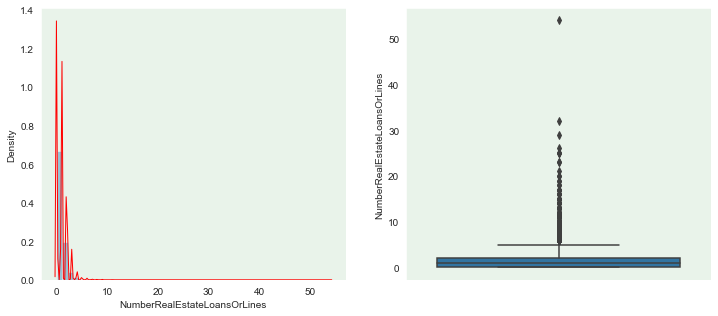

In [20]:
#2.1.7 固定资产贷款数量
print(trainingData['NumberRealEstateLoansOrLines'].describe())
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(12,5))
sns.distplot(trainingData['NumberRealEstateLoansOrLines'],ax=ax1,kde_kws={'linestyle':'-','linewidth':'1','color':'red'})
sns.boxplot(y='NumberRealEstateLoansOrLines',data=trainingData,ax=ax2)
plt.show()

In [21]:
print('查看箱型图发现最上方有异常值!\n')
print(trainingData[trainingData['NumberRealEstateLoansOrLines']>32].count())
#结论
print('\n固定资产贷款数量大于28的有两个，大于32有一个为54，所以决定把>32的当做异常值剔除!\n')

查看箱型图发现最上方有异常值!

SeriousDlqin2yrs                        1
RevolvingUtilizationOfUnsecuredLines    1
age                                     1
NumberOfTime30-59DaysPastDueNotWorse    1
DebtRatio                               1
MonthlyIncome                           1
NumberOfOpenCreditLinesAndLoans         1
NumberOfTimes90DaysLate                 1
NumberRealEstateLoansOrLines            1
NumberOfTime60-89DaysPastDueNotWorse    1
NumberOfDependents                      1
dtype: int64

固定资产贷款数量大于28的有两个，大于32有一个为54，所以决定把>32的当做异常值剔除!



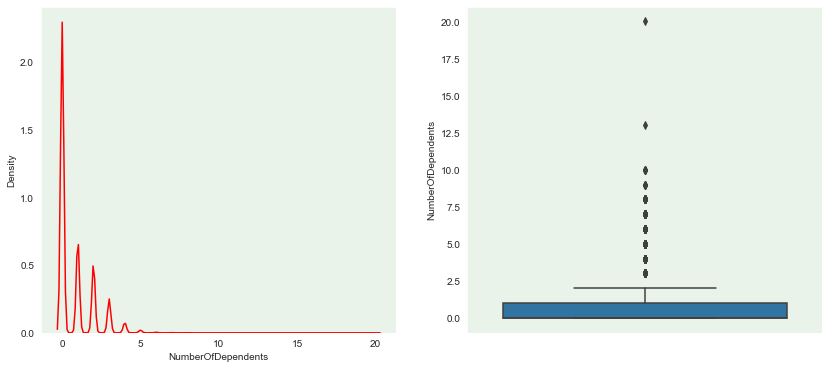

In [22]:
#2.1.8 家属数量分布
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(14,6))
sns.kdeplot(trainingData['NumberOfDependents'],ax=ax1,color='red')
sns.boxplot(y='NumberOfDependents',data=trainingData,ax=ax2)
plt.show()

In [23]:
print(trainingData['NumberOfDependents'].describe())
print('\n--------------------------------\n')
print(trainingData[trainingData['NumberOfDependents']>15].count())
print('\n结论：由箱型图和描述性统计可以看出，20为异常值，可删除')

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

--------------------------------

SeriousDlqin2yrs                        1
RevolvingUtilizationOfUnsecuredLines    1
age                                     1
NumberOfTime30-59DaysPastDueNotWorse    1
DebtRatio                               1
MonthlyIncome                           1
NumberOfOpenCreditLinesAndLoans         1
NumberOfTimes90DaysLate                 1
NumberRealEstateLoansOrLines            1
NumberOfTime60-89DaysPastDueNotWorse    1
NumberOfDependents                      1
dtype: int64

结论：由箱型图和描述性统计可以看出，20为异常值，可删除


In [24]:
#查看缺失比例
propotion=(trainingData['SeriousDlqin2yrs'].count()-trainingData['NumberOfDependents'].count())/trainingData['SeriousDlqin2yrs'].count()
print('家属数量缺失比例为%.2f%%'%(propotion*100))
print('结论：缺失比例为2.62%，可直接删除')

家属数量缺失比例为2.62%
结论：缺失比例为2.62%，可直接删除


count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64




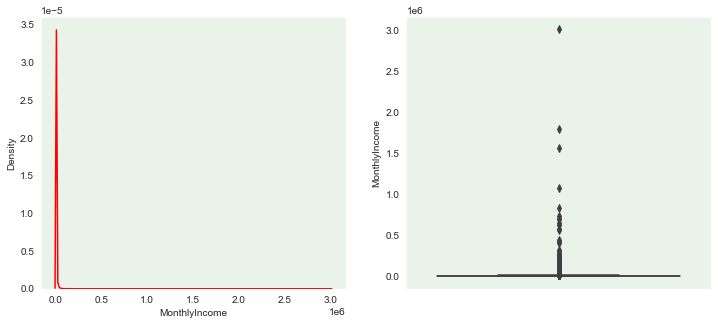


----------------------

SeriousDlqin2yrs                        1
RevolvingUtilizationOfUnsecuredLines    1
age                                     1
NumberOfTime30-59DaysPastDueNotWorse    1
DebtRatio                               1
MonthlyIncome                           1
NumberOfOpenCreditLinesAndLoans         1
NumberOfTimes90DaysLate                 1
NumberRealEstateLoansOrLines            1
NumberOfTime60-89DaysPastDueNotWorse    1
NumberOfDependents                      1
dtype: int64


In [25]:
#2.1.9 月收入
print(trainingData['MonthlyIncome'].describe())
print('\n')
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(12,5))
sns.kdeplot(trainingData['MonthlyIncome'],ax=ax1,color='red')
sns.boxplot(y='MonthlyIncome',data=trainingData,ax=ax2)
plt.show()
print('\n----------------------\n')
print(trainingData[trainingData['MonthlyIncome']>2000000].count())

In [26]:
#查看缺失比例
propotion=(trainingData['age'].count()-trainingData['MonthlyIncome'].count())/trainingData['age'].count()
print('月收入缺失数量比例为%.2f%%'%(propotion*100))
print('\n结论：由于月收入缺失数量过大，后面采用随机森林的方法填充缺失值')

月收入缺失数量比例为19.82%

结论：由于月收入缺失数量过大，后面采用随机森林的方法填充缺失值


In [27]:
#3、数据预处理
#3.1 异常值处理
#创建删除异常值函数myDelete:
def myDelete(data):
    data=data[data['RevolvingUtilizationOfUnsecuredLines']<1]
    data=data[data['age']>18]
    data=data[data['NumberOfTime30-59DaysPastDueNotWorse']<80]
    data=data[data['NumberOfTime60-89DaysPastDueNotWorse']<80]
    data=data[data['NumberOfTimes90DaysLate']<80]
    data=data[data['NumberOfDependents']<20]
    data=data[data['NumberRealEstateLoansOrLines']<50]
    return data
trainingData=myDelete(trainingData)
testData=myDelete(testData)

In [28]:
#检查处理结果
trainingData.loc[(trainingData['RevolvingUtilizationOfUnsecuredLines']>=1)|
                 (trainingData['age']<=18)|
                 (trainingData['NumberOfDependents']>=20)|
                 (trainingData['NumberOfTime30-59DaysPastDueNotWorse']>=80)|
                 (trainingData['NumberOfTime60-89DaysPastDueNotWorse']>=80)|
                 (trainingData['NumberOfTimes90DaysLate']>=80)|
                 (trainingData['NumberRealEstateLoansOrLines']>=50)]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Unnamed: 0,,,,,,,,,,,


In [29]:
#检查处理结果
print(trainingData.shape)

(142558, 11)


In [30]:
#3.2缺失值处理
#查看数据缺失情况
print(trainingData.isnull().sum())

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           25228
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                          0
dtype: int64


In [31]:
#3.2.1 对家属数量缺失的数据进行删除
trainingData=trainingData[trainingData['NumberOfDependents'].notnull()]
testData=testData[testData['NumberOfDependents'].notnull()]
print(trainingData.shape)
print(trainingData.isnull().sum())
print('\n----------------------------\n')
print(testData.shape)
print(testData.isnull().sum())

(142558, 11)
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           25228
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                          0
dtype: int64

----------------------------

(96533, 11)
SeriousDlqin2yrs                        96533
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           17085
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTim

In [32]:
#3.2.2 随机森林法填充月收入缺失值
#创建随机森林填充函数myFiller：
def myFiller(data):
    process=data.iloc[:,[5,0,1,2,3,4,6,7,8,9]]
    #分成已知该特征和未知该特征两部分
    known=process[process.MonthlyIncome.notnull()].values
    unKnown=process[process.MonthlyIncome.isnull()].values
    X=known[:,1:]
    Y=known[:,0]
    rand=RandomForestRegressor(random_state=0, n_estimators=200,max_depth=3,n_jobs=-1)
    rand.fit(X,Y)
    # 用得到的模型进行未知特征值预测 月收入
    predicted=rand.predict(unKnown[:,1:]).round(0)
    print(predicted)
    # 用得到的预测结果填补原缺失数据
    data.loc[data.MonthlyIncome.isnull(),'MonthlyIncome']=predicted
    return data

In [33]:
#使用myFiller填充缺失值
#训练集
trainingData=myFiller(trainingData)
print(trainingData.info())
print('\n---------------------------\n')

[8478. 8478. 1889. ... 1157. 1889. 1889.]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 142558 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      142558 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  142558 non-null  float64
 2   age                                   142558 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  142558 non-null  int64  
 4   DebtRatio                             142558 non-null  float64
 5   MonthlyIncome                         142558 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       142558 non-null  int64  
 7   NumberOfTimes90DaysLate               142558 non-null  int64  
 8   NumberRealEstateLoansOrLines          142558 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  142558 non-null  int64  
 10  NumberOfDependents        

In [34]:
#创建随机森林填充函数myFiller2：
def myFiller2(data):
    process=data.iloc[:,[5,0,2,3,4,6,7,8,9]]
    #分成已知该特征和未知该特征两部分
    known=process[process.MonthlyIncome.notnull()].values
    unKnown=process[process.MonthlyIncome.isnull()].values
    X=known[:,2:]
    Y=known[:,0]
    rand=RandomForestRegressor(random_state=0, n_estimators=200,max_depth=3,n_jobs=-1)
    rand.fit(X,Y)
    # 用得到的模型进行未知特征值预测 月收入
    predicted=rand.predict(unKnown[:,2:]).round(0)
    print(predicted)
    # 用得到的预测结果填补原缺失数据
    data.loc[data.MonthlyIncome.isnull(),'MonthlyIncome']=predicted
    return data

In [35]:
testData=myFiller2(testData)
print(testData.info())

[3255. 1999. 8396. ... 1999. 1999. 8396.]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 96533 entries, 1 to 101503
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      0 non-null      float64
 1   RevolvingUtilizationOfUnsecuredLines  96533 non-null  float64
 2   age                                   96533 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  96533 non-null  int64  
 4   DebtRatio                             96533 non-null  float64
 5   MonthlyIncome                         96533 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       96533 non-null  int64  
 7   NumberOfTimes90DaysLate               96533 non-null  int64  
 8   NumberRealEstateLoansOrLines          96533 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  96533 non-null  int64  
 10  NumberOfDependents                    9

In [36]:
#缺失值和异常值处理完毕后检查结果
trainingData=trainingData[trainingData['MonthlyIncome']<2000000]
print(trainingData.isnull().sum())
print('\n--------------------------------\n')
print(testData.isnull().sum())

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

--------------------------------

SeriousDlqin2yrs                        96533
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                               0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents            

In [37]:
#3.3 特征工程--判断特征之间的共线性
#两个或多个特征之间，相关系数>=0.8时，意味着这些特征中包含了类似的信息
#共线性特征可能会降低运算效率、降低模型稳定性、弱化模型预测能力
#因此需要通过建立共线性表格或热力图的方式查看共线性，并给予删除或变换！

In [38]:
#建立共线性表格
table=pd.DataFrame(trainingData.corr())
print(table)

                                      SeriousDlqin2yrs  \
SeriousDlqin2yrs                              1.000000   
RevolvingUtilizationOfUnsecuredLines          0.244166   
age                                          -0.101794   
NumberOfTime30-59DaysPastDueNotWorse          0.248894   
DebtRatio                                    -0.006210   
MonthlyIncome                                -0.016383   
NumberOfOpenCreditLinesAndLoans              -0.018041   
NumberOfTimes90DaysLate                       0.296602   
NumberRealEstateLoansOrLines                  0.004388   
NumberOfTime60-89DaysPastDueNotWorse          0.244000   
NumberOfDependents                            0.043733   

                                      RevolvingUtilizationOfUnsecuredLines  \
SeriousDlqin2yrs                                                  0.244166   
RevolvingUtilizationOfUnsecuredLines                              1.000000   
age                                                              -0.2

<AxesSubplot:>

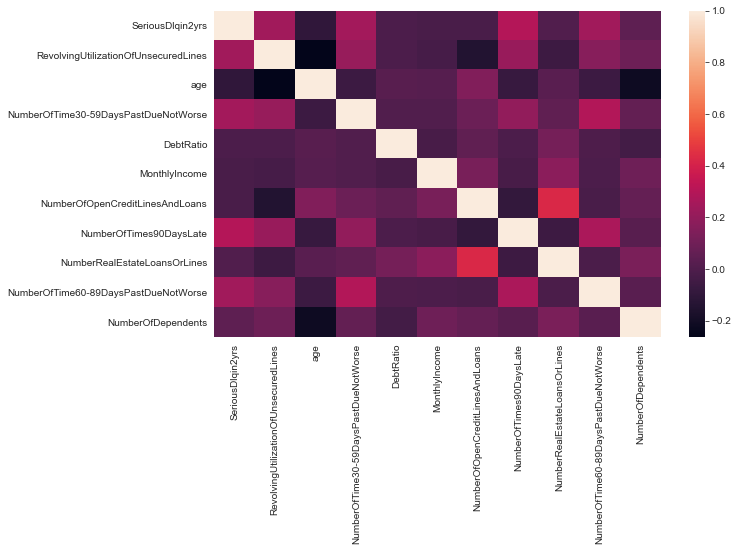

In [39]:
#共线性表格比较抽象，不直观
#用热力图法更直观
#创建热力图
f=plt.figure(figsize=(10,6))
sns.heatmap(table,annot_kws={'size':10,'weight':'bold','color':'black'})

In [40]:
#得出结论
print('    结论：从共线性表格和热力图中，不难看出：各个变量之间的相关性都不大，很多的相关性都在0.1~0.2左右，最高值也不超过0.5，因此无需剔除变量。')

    结论：从共线性表格和热力图中，不难看出：各个变量之间的相关性都不大，很多的相关性都在0.1~0.2左右，最高值也不超过0.5，因此无需剔除变量。


In [41]:
#4、特征选择
#使用IV值进行特征选择并且使用WOE对数据进行分箱
#划分数据
Y=trainingData['SeriousDlqin2yrs']
X=trainingData.iloc[:,1:]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
training = pd.concat([Y_train, X_train], axis=1)
testing = pd.concat([Y_test, X_test], axis=1)
clasTest = testing.groupby('SeriousDlqin2yrs')['SeriousDlqin2yrs'].count()

In [42]:
#4.1 分箱
#4.1.1 连续性变量
#采取定义自动分箱函数的方式--最优分箱
def autoBin(target,data,n=10): #data为待分箱变量，n为分箱数量
    r=0 #斯皮尔曼初始值
    bad=target.sum() #计算坏样本的数量
    good=target.count()-bad #计算好样本的数量
    #以下是机器来自动选择指定最优的分箱节点，代替我们自己来设置
    while np.abs(r)<1:
        #用pd.qcut实现最优分箱，Bucket：将data分为n段（n由斯皮尔曼系数决定）
        d1=pd.DataFrame({"data":data,"target":target,"Bucket":pd.qcut(data,n)})
        #按照分箱结果进行分组聚合
        d2=d1.groupby('Bucket',as_index=True)
        #以斯皮尔曼系数作为分箱终止条件
        r,p=stats.spearmanr(d2.mean().data,d2.mean().target)
        n-=1
    d3=pd.DataFrame(d2.data.min(),columns=['min'])
    d3['min']=d2.min().data #左边界
    d3['max']=d2.max().data #右边界
    d3['bad']=d2.sum().target #每个箱体中坏的样本的数量
    d3['total']=d2.count().target #每个箱体的总样本数
    d3['rate']=d2.mean().target
    print(d3['rate'])
    print('---------------------')
    #计算每个箱体的WOE值
    d3['woe']=np.log((d3['bad']/bad)/((d3['total']-d3['bad'])/good))
    #计算每个箱体中坏样本所占坏样本总数的比例
    d3['badattr']=d3['bad']/bad
    #计算每个箱体中好样本所占好样本总数的比例
    d3['goodattr']=(d3['total']-d3['bad'])/good
    #计算变量的IV值
    iv=((d3['badattr']-d3['goodattr'])*d3['woe']).sum()
    #对箱体从大到小进行排序
    d4=(d3.sort_values(by = 'min')).reset_index(drop=True)
    print('分箱结果：')
    print(d4)
    print('IV值为：')
    print(iv)
    print('\n')
    woe=list(d4['woe'].round(3))
    cut=[] #cut用来存放箱段节点
    cut.append(float('-inf'))#在列表前加上-inf
    for i in range(1,n+1):# n是前面的分箱的分割数，所以分成n+1份
        qua=data.quantile(i/(n+1))#quantile 分为数,得到分箱的节点
        cut.append(round(qua,4))#保留4位小数，返回cut
    cut.append(float('inf'))#在列表后加上inf
    return d4,iv,cut,woe    

In [43]:
x1_d,x1_iv,x1_cut,x1_woe=autoBin(training['SeriousDlqin2yrs'],training.RevolvingUtilizationOfUnsecuredLines)
x2_d,x2_iv,x2_cut,x2_woe=autoBin(training['SeriousDlqin2yrs'],training.age)
x4_d,x4_iv,x4_cut,x4_woe=autoBin(training['SeriousDlqin2yrs'],training.DebtRatio)
x5_d,x5_iv,x5_cut,x5_woe=autoBin(training['SeriousDlqin2yrs'],training.MonthlyIncome)

Bucket
(-0.001, 0.0295]    0.018939
(0.0295, 0.148]     0.020062
(0.148, 0.521]      0.047245
(0.521, 1.0]        0.153941
Name: rate, dtype: float64
---------------------
分箱结果：
        min       max   bad  total      rate       woe   badattr  goodattr
0  0.000000  0.029522   540  28512  0.018939 -1.196679  0.078855  0.260940
1  0.029525  0.147625   572  28511  0.020062 -1.137928  0.083528  0.260632
2  0.147633  0.520663  1347  28511  0.047245 -0.253301  0.196700  0.253403
3  0.520689  1.000000  4389  28511  0.153941  1.046689  0.640917  0.225025
IV值为：
0.8691016132135023


Bucket
(20.999, 34.0]    0.095393
(34.0, 40.0]      0.082395
(40.0, 45.0]      0.075485
(45.0, 50.0]      0.074757
(50.0, 54.0]      0.067801
(54.0, 59.0]      0.049366
(59.0, 64.0]      0.037166
(64.0, 71.0]      0.026866
(71.0, 103.0]     0.023274
Name: rate, dtype: float64
---------------------
分箱结果：
   min  max   bad  total      rate       woe   badattr  goodattr
0   21   34  1348  14131  0.095393  0.501217  0.19

In [44]:
#4.1.2 离散型变量
#手动分箱法
def myBin(target,data,cut):
    bad=target.sum() #坏样本数量
    good=target.count()-bad #好样本数量
    #建立个数据框 data-- 各个特征变量 ， target--用户好坏标签 ， Bucket--各个分箱    
    d1=pd.DataFrame({"data":data,"target":target,"Bucket":pd.cut(data,cut)})
    #按照分箱结果进行分组聚合
    d2=d1.groupby('Bucket',as_index=True)
    #添加 min 列 ,不用管里面的 d2.X.min()
    d3=pd.DataFrame(d2.data.min(),columns=['min'])
    d3['min']=d2.min().data
    d3['max']=d2.max().data
    d3['bad']=d2.sum().target
    d3['total']=d2.count().target
    d3['rate']=d2.mean().target
    #计算每个箱体的WOE值
    d3['woe']=np.log((d3['bad']/bad)/((d3['total']-d3['bad'])/good))
    #每个箱体中坏样本所占坏样本总数的比例
    d3['badattr']=d3['bad']/bad
    #每个箱体中好样本所占好样本总数的比例
    d3['goodattr']=(d3['total']-d3['bad'])/good
    #计算变量的V值
    iv=((d3['badattr']-d3['goodattr'])*d3['woe']).sum()
    #对箱体从大到小进行排序
    d4=(d3.sort_values(by='min')).reset_index(drop=True)
    woe=list(d4['woe'].round(3))
    print(d3['rate'])
    print("------------------------")
    print('分箱结果：')
    print(d4)
    print("IV值为：")
    print(iv)
    print('\n')
    return d4,iv,woe

In [45]:
ninf = float('-inf')#负无穷大
pinf = float('inf')#正无穷大
cutx3 = [ninf, 0, 1, 3, 5, pinf]
cutx6 = [ninf, 1, 2, 3, 5, pinf]
cutx7 = [ninf, 0, 1, 3, 5, pinf]
cutx8 = [ninf, 0,1,2, 3, pinf]
cutx9 = [ninf, 0, 1, 3, pinf]
cutx10 = [ninf, 0, 1, 2, 3, 5, pinf]
dfx3,ivx3,woex3 = myBin(training.SeriousDlqin2yrs,training['NumberOfTime30-59DaysPastDueNotWorse'], cutx3)
dfx6,ivx6 ,woex6= myBin(training.SeriousDlqin2yrs, training['NumberOfOpenCreditLinesAndLoans'], cutx6)
dfx7,ivx7,woex7 = myBin(training.SeriousDlqin2yrs, training['NumberOfTimes90DaysLate'], cutx7)
dfx8, ivx8,woex8 = myBin(training.SeriousDlqin2yrs, training['NumberRealEstateLoansOrLines'], cutx8)
dfx9, ivx9,woex9 = myBin(training.SeriousDlqin2yrs, training['NumberOfTime60-89DaysPastDueNotWorse'], cutx9)
dfx10,ivx10,woex10 = myBin(training.SeriousDlqin2yrs, training['NumberOfDependents'], cutx10)

Bucket
(-inf, 0.0]    0.038333
(0.0, 1.0]     0.133780
(1.0, 3.0]     0.263004
(3.0, 5.0]     0.400549
(5.0, inf]     0.496732
Name: rate, dtype: float64
------------------------
分箱结果：
   min  max   bad  total      rate       woe   badattr  goodattr
0    0    0  3709  96758  0.038333 -0.471652  0.541618  0.868019
1    1    1  1598  11945  0.133780  0.882768  0.233353  0.096523
2    2    3  1173   4460  0.263004  1.720301  0.171291  0.030663
3    4    5   292    729  0.400549  2.347532  0.042640  0.004077
4    6   12    76    153  0.496732  2.737640  0.011098  0.000718
IV值为：
0.6356038610056689


Bucket
(-inf, 1.0]    0.156799
(1.0, 2.0]     0.082220
(2.0, 3.0]     0.065250
(3.0, 5.0]     0.055159
(5.0, inf]     0.054182
Name: rate, dtype: float64
------------------------
分箱结果：
   min  max   bad  total      rate       woe   badattr  goodattr
0    0    1   678   4324  0.156799  1.068473  0.099007  0.034012
1    2    2   394   4792  0.082220  0.338157  0.057535  0.041027
2    3    3   430 

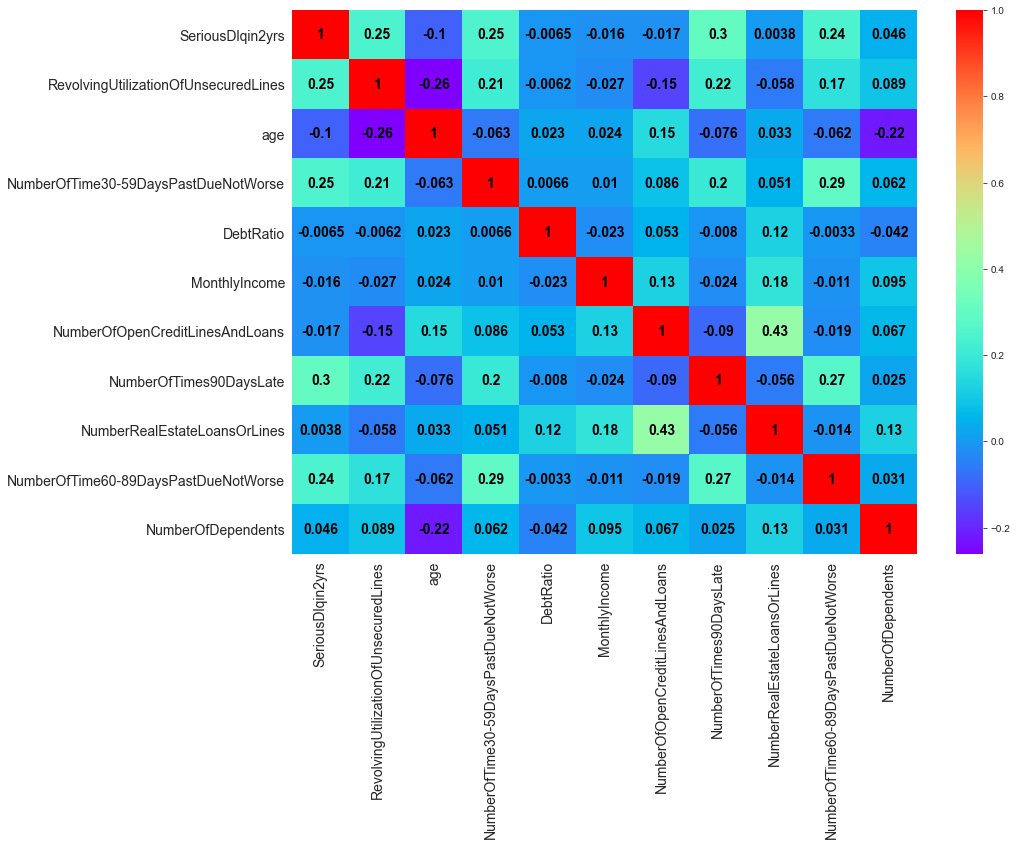

In [46]:
#4.2 特征选择
#4.2.1 利用相关系数矩阵
corr=training.corr()#极端相关性系数
x=list(corr.index)
y=list(corr.index)
fig=plt.figure(figsize=(14,10))
ax1=fig.add_subplot(1,1,1)
#绘制相关性系数热力图
sns.heatmap(corr,annot=True,ax=ax1,cmap='rainbow',annot_kws={'size':14,'weight':'bold','color':'black'})
ax1.set_xticklabels(x,rotation=90,fontsize=14)
ax1.set_yticklabels(y,rotation=0,fontsize=14)
plt.show()

In [47]:
#结论：
print('结论：\n    可见变量RevolvingUtilizationOfUnsecuredLines、NumberOfTime30-59DaysPastDueNotWorse、NumberOfTimes90DaysLate和NumberOfTime60-89DaysPastDueNotWorse四个特征对于我们所要预测的值SeriousDlqin2yrs(因变量)有较强的相关性。')

结论：
    可见变量RevolvingUtilizationOfUnsecuredLines、NumberOfTime30-59DaysPastDueNotWorse、NumberOfTimes90DaysLate和NumberOfTime60-89DaysPastDueNotWorse四个特征对于我们所要预测的值SeriousDlqin2yrs(因变量)有较强的相关性。


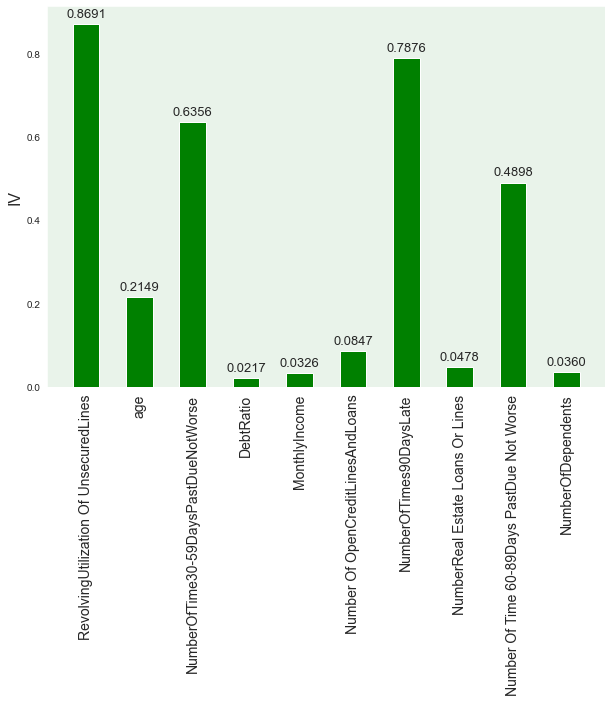

In [48]:
#进一步检查模型的VI（证据权重）作为变量筛选的依据
#4.2.2 IV值筛选
#通过IV值判断变量预测能力的标准是:
#小于 0.02: unpredictive；0.02 to 0.1: weak；0.1 to 0.3: medium； 0.3 to 0.5: strong
ivlist=[x1_iv,x2_iv,ivx3,x4_iv,x5_iv,ivx6,ivx7,ivx8,ivx9,ivx10] #各变量IV
index=['RevolvingUtilization Of UnsecuredLines',
       'age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio',
       'MonthlyIncome','Number Of OpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate','NumberReal Estate Loans Or Lines',
       'Number Of Time 60-89Days PastDue Not Worse','NumberOfDependents']#x轴的标签
fig_1=plt.figure(1,figsize=(10,7))
ax_1=fig_1.add_subplot(1,1,1)
x1=np.arange(len(index))+1
ax_1.bar(x1,ivlist,width=0.5,color='green') #生成柱状图 
ax_1.set_xticks(x1)
ax_1.set_xticklabels(index,rotation=90,fontsize=14)
ax_1.set_ylabel('IV',fontsize=16)
#在柱状图上加上数字和标签
for a,b in zip(x1,ivlist):
    plt.text(a,b+0.01,'%.4f'%b,ha='center',va='bottom',fontsize=13)
plt.show()

In [49]:
#结论：
print('结论：\n    可以看出，DebtRatio、MonthlyIncome、NumberOfOpenCreditLinesAndLoans、NumberRealEstateLoansOrLines和NumberOfDependents变量的IV值明显较低，所以予以删除。')
print('    故选择特征：RevolvingUtilizationOfUnsecuredLines、age、NumberOfTime30-59DaysPastDueNotWorse、NumberOfTimes90DaysLate、NumberOfTime60-89DaysPastDueNotWorse作为后续评分模型建立的对象。\n')

结论：
    可以看出，DebtRatio、MonthlyIncome、NumberOfOpenCreditLinesAndLoans、NumberRealEstateLoansOrLines和NumberOfDependents变量的IV值明显较低，所以予以删除。
    故选择特征：RevolvingUtilizationOfUnsecuredLines、age、NumberOfTime30-59DaysPastDueNotWorse、NumberOfTimes90DaysLate、NumberOfTime60-89DaysPastDueNotWorse作为后续评分模型建立的对象。



In [50]:
#5、模型建立
#5.1 一些准备
#将筛选后的变量转换为WOE值，便于信用评分
def toWOE(var,var_name,woe,cut):
    woe_name=var_name+'woe'
    for i in range(len(woe)): # len(woe) 得到woe里 有多少个数值
        if i==0:
            #将woe的值按 cut分箱的下节点，顺序赋值给var的woe_name列,分箱的第一段
            var.loc[(var[var_name]<=cut[i+1]),woe_name]=woe[i]
        elif(i>0)and(i<=len(woe)-2):
            #处理中间的分箱区间
            var.loc[((var[var_name]>cut[i])&(var[var_name]<=cut[i+1])),woe_name]=woe[i]
        else:
            #大于最后一个分箱区间的上限值,最后一个值是正无穷
            var.loc[(var[var_name]>cut[len(woe)-1]),woe_name]=woe[len(woe)-1]
    return var

In [51]:
x1_name='RevolvingUtilizationOfUnsecuredLines'
x2_name='age'
x3_name='NumberOfTime30-59DaysPastDueNotWorse'
x7_name='NumberOfTimes90DaysLate'
x9_name='NumberOfTime60-89DaysPastDueNotWorse'
training=toWOE(training,x1_name,x1_woe,x1_cut)
training=toWOE(training,x2_name,x2_woe,x2_cut)
training=toWOE(training,x3_name,woex3,cutx3)
training=toWOE(training,x7_name,woex7,cutx7)
training=toWOE(training,x9_name,woex9,cutx9)

In [52]:
Y=training['SeriousDlqin2yrs']   #因变量
#剔除对因变量影响不明显的变量
X=training.drop(['SeriousDlqin2yrs','DebtRatio','MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','NumberOfDependents'],axis=1)
X=training.iloc[:,-5:]
X.head(5)

,RevolvingUtilizationOfUnsecuredLineswoe,agewoe,NumberOfTime30-59DaysPastDueNotWorsewoe,NumberOfTimes90DaysLatewoe,NumberOfTime60-89DaysPastDueNotWorsewoe
Unnamed: 0,,,,,
13017,1.047,-0.207,-0.472,-0.347,-0.242
60720,-1.138,-0.986,-0.472,-0.347,-0.242
67395,1.047,0.130,0.883,-0.347,-0.242
56109,-1.197,-0.986,-0.472,-0.347,-0.242
130935,-1.197,-0.504,-0.472,-0.347,-0.242


In [53]:
#5.2 利用STATSMODEL包来建立逻辑回归模型得到回归系数，后面可用于建立标准评分卡
X1=sm.add_constant(X)
logit=sm.Logit(Y,X1)
result=logit.fit()
print(result)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.176636
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               114045
Model:                          Logit   Df Residuals:                   114039
Method:                           MLE   Df Model:                            5
Date:                Sun, 30 May 2021   Pseudo R-squ.:                  0.2222
Time:                        10:29:45   Log-Likelihood:                -20144.
converged:                       True   LL-Null:                       -25899.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.7251

In [54]:
testing=toWOE(testing,x1_name,x1_woe,x1_cut)
training=toWOE(testing,x2_name,x2_woe,x2_cut)
testing=toWOE(testing,x3_name,woex3,cutx3)
testing=toWOE(testing,x7_name,woex7,cutx7)
testing=toWOE(testing,x9_name,woex9,cutx9)

Unnamed: 0
133372    0.070009
120974    0.038721
34453     0.086396
65321     0.018680
4704      0.069682
            ...   
26355     0.010535
104673    0.086396
115388    0.034027
115920    0.019418
121066    0.045917
Length: 28512, dtype: float64


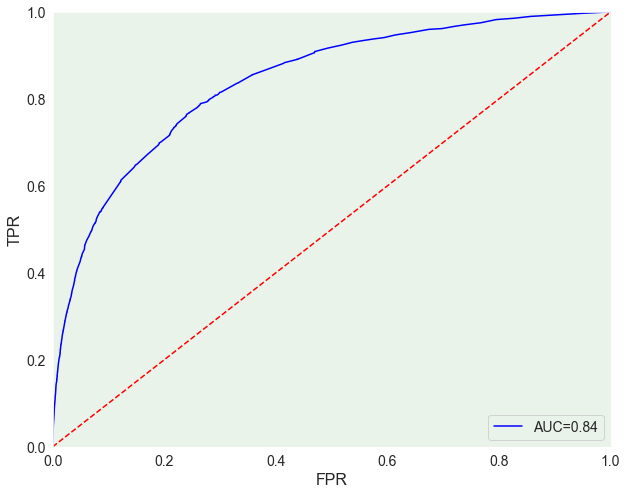

In [55]:
#测试集的特征和标签
test_X=testing.iloc[:,-5:]
test_Y=testing.iloc[:,0]
#评估
X3=sm.add_constant(test_X)
resu=result.predict(X3)
print(resu)
fpr,tpr,threshold=metrics.roc_curve(test_Y,resu)   #评估算法
rocauc=metrics.auc(fpr,tpr)   #计算AUC
#绘图
plt.figure(figsize=(10,8))  #只能在这里面设置
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'% rocauc)
plt.legend(loc='lower right',fontsize=14)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('TPR',fontsize=16)
plt.xlabel('FPR',fontsize=16)
plt.show()

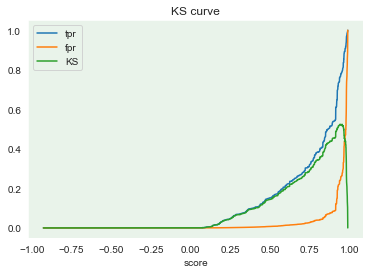

<Figure size 1440x1440 with 0 Axes>

0.5241713995900088

In [56]:
#KS指标: 用以评估模型对好、坏客户的判别区分能力
#计算累计坏客户与累计好客户百分比的最大差距。
fig,ax = plt.subplots()
ax.plot(1-threshold,tpr,label='tpr')
ax.plot(1-threshold,fpr,label='fpr')
ax.plot(1-threshold,tpr-fpr,label='KS')
plt.xlabel('score')
plt.title('KS curve')
plt.xlim=([0.0,1.0])
plt.ylim=([0.0,1.0])
plt.figure(figsize=(20,20))
legend=ax.legend(loc='upper left')
plt.show()
max(tpr-fpr)

In [65]:
#结论
print('结论：\n    AUC值达到0.84，KS值达到0.524，表明该模型较好')

结论：
    AUC值达到0.84，KS值达到0.524，表明该模型较好


In [58]:
#6、创建信用评分卡
#6.1 在建立标准评分卡之前，还需要设定几个评分卡参数：基础分值、 PDO（比率翻倍的分值）和好坏比。 
#我们取600分为基础分值b，取20为PDO （每高20分好坏比翻一倍），好坏比O取20。
p=20/np.log(2) #比例因子
q=600-20*np.log(20)/np.log(2) #偏移量
x_coe=[-2.7251,0.6565,0.5041,0.5576,0.5965,0.4276] #上面计算得出的回归系数
base=round(q+p*x_coe[0],0) #基础得分
#总分=基础分+各部分得分
def Score(coe,woe,factor):
    scores=[]
    for k in woe:
        score=round(coe*k*factor,0)
        scores.append(score)
    return scores
#每一项得分
x1_score=Score(x_coe[1],x1_woe,p) #注：'RevolvingUtilizationOfUnsecuredLines'
x2_score=Score(x_coe[2],x2_woe,p) #注：'age'
x3_score=Score(x_coe[3],woex3,p) #注：'NumberOfTime30-59DaysPastDueNotWorse'
x7_score=Score(x_coe[4],woex7,p) #注：'NumberOfTimes90DaysLate'
x9_score=Score(x_coe[5],woex9,p) #注：'NumberOfTime60-89DaysPastDueNotWorse'

In [59]:
#6.2 计算得分
def compute(series,cut,score):
    i=0
    list=[]
    while i<len(series):
        value=series.iloc[i]
        temp1=len(cut)-2
        temp2=len(cut)-2
        while temp1>=0:
            if value >=cut[temp1]:
                temp1-=1
            else:
                temp1-=1
                temp2-=1
        list.append(score[temp2])
        i+=1
    return list

In [60]:
#计算得分
trainingData['BaseScore']=np.zeros(len(trainingData))+base
trainingData['x1']=compute(trainingData['RevolvingUtilizationOfUnsecuredLines'],x1_cut,x1_score)
trainingData['x2']=compute(trainingData['age'], x2_cut, x2_score)
trainingData['x3']=compute(trainingData['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, x3_score)
trainingData['x7']=compute(trainingData['NumberOfTimes90DaysLate'], cutx7, x7_score)
trainingData['x9']=compute(trainingData['NumberOfTime60-89DaysPastDueNotWorse'],cutx9,x9_score)
trainingData['Score']=trainingData['x1']+trainingData['x2']+trainingData['x3']+trainingData['x7']+trainingData['x9']+base
#选取需要的列，就是评分列
scoreTable1=trainingData.iloc[:,[0,-7,-6,-5,-4,-3,-2,-1]]
scoreTable1.head(5)

,SeriousDlqin2yrs,BaseScore,x1,x2,x3,x7,x9,Score
Unnamed: 0,,,,,,,,
1,1,435.0,20.0,3.0,28.0,34.0,23.0,543.0
2,0,435.0,20.0,4.0,14.0,34.0,23.0,530.0
3,0,435.0,20.0,5.0,28.0,47.0,23.0,558.0
4,0,435.0,-5.0,7.0,14.0,34.0,23.0,508.0
5,0,435.0,20.0,3.0,28.0,34.0,23.0,543.0


In [61]:
colName={'x1':'RevolvingUtilizationOfUnsecuredLines','x2':'age',
        'x3':'NumberOfTime30-59DaysPastDueNotWorse','x7':'NumberOfTimes90DaysLate',
        'x9':'NumberOfTime60-89DaysPastDueNotWorse'}
scoreTable1=scoreTable1.rename(columns=colName,inplace=False)
scoreTable1.to_excel(r'D:\陈奕阳文件\北大课程资料\专业课\人工智能引论\小班课大作业\scoreTable.xlsx')

In [62]:
#7、利用模型预测测试集
#7.1 测试集转化为WOE值
testData=toWOE(testData,x1_name,x1_woe,x1_cut)
testData=toWOE(testData,x2_name,x2_woe,x2_cut)
testData=toWOE(testData,x3_name,woex3,cutx3)
testData=toWOE(testData,x7_name,woex7,cutx7)
testData=toWOE(testData,x9_name,woex9,cutx9)
#自变量，剔除对因变量影响不明显的变量
testData=testData.drop(['DebtRatio','MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','NumberOfDependents'],axis=1)
#测试集的特征和标签
test_X=testData.iloc[:,-5:]
test_Y=testData.iloc[:,0]
#7.2 评估
X_=sm.add_constant(test_X)
list=result.predict(X_)
testData['predict']=list

In [63]:
#7.3 对测试集进行评分
testData['BaseScore']=np.zeros(len(testData))+base
testData['x1'] = compute(testData['RevolvingUtilizationOfUnsecuredLines'], x1_cut, x1_score)
testData['x2'] = compute(testData['age'], x2_cut, x2_score)
testData['x3'] = compute(testData['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, x3_score)
testData['x7'] = compute(testData['NumberOfTimes90DaysLate'], cutx7, x7_score)
testData['x9'] = compute(testData['NumberOfTime60-89DaysPastDueNotWorse'],cutx9,x9_score)
testData['Score'] = testData['x1'] + testData['x2'] + testData['x3'] + testData['x7'] +testData['x9']  + base
#选取需要的列，就是评分列
scoretable2=testData.iloc[:,[0,-8,-7,-6,-5,-4,-3,-2,-1]]  
print(scoretable2.head(5))

            SeriousDlqin2yrs   predict  BaseScore    x1   x2    x3    x7  \
Unnamed: 0                                                                 
1                        NaN  0.076739      435.0  20.0  4.0  14.0  34.0   
2                        NaN  0.027417      435.0  -5.0 -3.0  14.0  34.0   
3                        NaN  0.015523      435.0 -22.0 -7.0  14.0  34.0   
4                        NaN  0.073192      435.0  -5.0  5.0  28.0  34.0   
5                        NaN  0.086396      435.0  20.0  7.0  14.0  34.0   

              x9  Score  
Unnamed: 0               
1           23.0  530.0  
2           23.0  498.0  
3           23.0  477.0  
4           23.0  520.0  
5           23.0  533.0  


In [64]:
#输出结果
colNameDict={'x1': 'RevolvingUtilizationOfUnsecuredLines' ,'x2':'age','x3':'NumberOfTime30-59DaysPastDueNotWorse',
             'x7':'NumberOfTimes90DaysLate', 'x9':'NumberOfTime60-89DaysPastDueNotWorse'}
scoretable2=scoretable2.rename(columns=colNameDict,inplace=False)
scoretable2.to_excel(r'D:\陈奕阳文件\北大课程资料\专业课\人工智能引论\小班课大作业\scoreTable2.xlsx')